In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

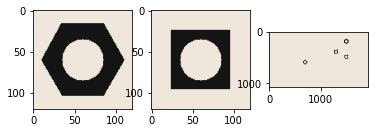

In [6]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

In [9]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

In [20]:
def OtsuThresh(image):
    threshhold, binarized_image =  cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU,)
    return threshhold, binarized_image

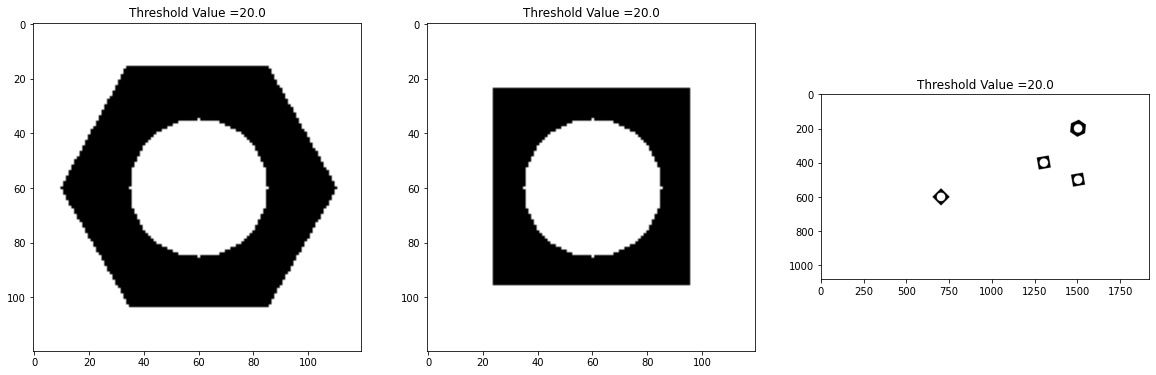

In [33]:
threshold_values = []
otsu_resulted_images = []
input_images = [hexnut_template_gray, squarenut_template_gray, conveyor_f100_gray]
fig, ax = plt. subplots(1,3, figsize = (20,20) )
for i in range(len(input_images)):
    threshold, otsuresult = OtsuThresh(input_images[i])
    threshold_values.append(threshold)
    ax[i].imshow(cv.cvtColor(otsuresult, cv.COLOR_BGR2RGB))
    ax[i].title.set_text("Threshold Value ="+ str(threshold))
    otsu_resulted_images.append(otsuresult)

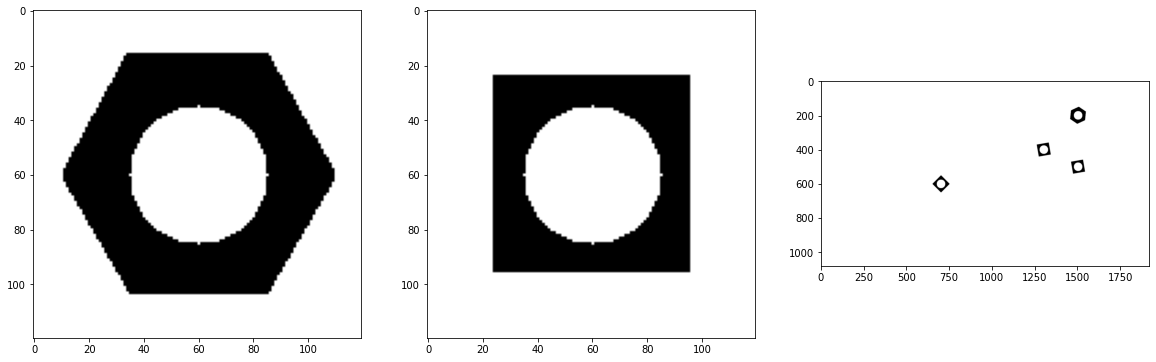

In [34]:
kernel = np.ones((3,3),np.uint8)
morphological_closing_results = []
fig, ax = plt. subplots(1,3, figsize = (20,20) )
for i in range(len(otsu_resulted_images)):
    closing_image = cv.morphologyEx(otsu_resulted_images[i], cv.MORPH_CLOSE, kernel)
    morphological_closing_results.append(closing_image)
    ax[i].imshow(cv.cvtColor(closing_image, cv.COLOR_BGR2RGB))